# Connecticut Real Estate 2011-2021
### Aaron 'Asa' Sherwyn
# 03 Exploratory Visual Analysis
1. Imports and Set-up
1. Variable Correlations
    - Correlations heatmap
    - Strong correlations scatterplot
1. Pair Plots
1. Categorical Plots
1. Property Type Categorical Plots
1. Residential Correlations
1. Residential Pair Plots
1. Residential Categorical Plots
4. Exports
1. Hypotheses

__Note: During the EVA it became clear that the full analysis could onlt be conducted on residential property types as all others lack historic records. This is shown in step 5. Property Type Categorical Plots. The remaining steps are an EVA conducted on just residential property types.__

## 1. Imports and Set-up

In [1]:
#loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Creating a path to the root directory for this project
path = r'C:\Users\theva\OneDrive\CareerFoundry\Data Immersion\A6\Connecticut Real Estate 2001-2020'

In [3]:
#Importing main dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'CTRE 2011-2021 WRANGLED.pkl'))

In [4]:
#Increasing display limit
pd.set_option('display.max_rows', 200)

In [5]:
#Checking df
df.head(20)

serial_number  list_year        town  assessed_value  sale_amount  \
0         2020348       2020     Ansonia          150500     325000.0   
1           20002       2020     Ashford          253000     430000.0   
2          200212       2020        Avon          130400     179900.0   
3          200243       2020        Avon          619290     890000.0   
4          200377       2020        Avon          862330    1447500.0   
5          200109       2020        Avon          847520    1250000.0   
6         2020313       2020      Berlin          412000     677500.0   
7          200097       2020     Bethany          511000     795000.0   
8           20139       2020      Bethel          171360     335000.0   
9          200086       2020   Bethlehem          168900     352000.0   
10        2000381       2020  Bloomfield          163730     250000.0   
11         200258       2020    Branford          530500     700000.0   
12         200804       2020    Branford          455100     650000.0   
13         201295       2020     Bristol          144340     249900.0   
14         200032       2020     Bristol           94920     155000.0   
15         200354       2020     Bristol          173740     299000.0   
16         200527       2020     Bristol           85680     183000.0   
17         201212       2020     Bristol           88060      91000.0   
18       20000050       2020  Brookfield          105110     160000.0   
19       20000179       2020  Brookfield           94770     170000.0   

    sales_ratio property_type residential_type  in_pandemic  month  year  \
0      0.463000    Commercial              NaN            1      9  2021   
1      0.588300   Residential    Single Family            1     10  2020   
2      0.724800   Residential            Condo            1      3  2021   
3      0.695800   Residential    Single Family            1      4  2021   
4      0.595700   Residential    Single Family            1      7  2021   
5      0.678000   Residential    Single Family            1     12  2020   
6      0.608100   Residential    Single Family            1      7  2021   
7      0.642700    Commercial              NaN            1      6  2021   
8      0.511500   Residential    Single Family            1     12  2020   
9      0.479800   Residential    Single Family            1      8  2021   
10     0.654900   Residential            Condo            1      9  2021   
11     0.757800   Residential    Single Family            1      1  2021   
12     0.700100    Commercial              NaN            1      9  2021   
13     0.577500   Residential    Single Family            1      9  2021   
14     0.612300   Residential    Single Family            1     10  2020   
15     0.581000   Residential    Single Family            1     12  2020   
16     0.468100   Residential       Two Family            1      3  2021   
17     0.967600   Residential    Single Family            1      8  2021   
18     0.656937   Residential            Condo            1     11  2020   
19     0.557400   Residential            Condo            1      2  2021   

    street_number street_suffix  population  latitude  longitude  price_index  \
0           230.0        AVENUE       18945   41.3462   -73.0790      269.086   
1           390.0          ROAD        4193   41.8731   -72.1216      254.076   
2             5.0         DRIVE       18821   41.8096   -72.8305      258.935   
3           111.0         DRIVE       18821   41.8096   -72.8305      261.237   
4            70.0         DRIVE       18821   41.8096   -72.8305      267.789   
5            57.0         DRIVE       18821   41.8096   -72.8305      254.081   
6           216.0          ROAD       20107   41.6215   -72.7457      267.789   
7            23.0          ROAD        5331   41.4218   -72.9970      266.412   
8            16.0         DRIVE       20287   41.3712   -73.4140      254.081   
9            39.0          ROAD        3408   41.6404   -73.205

In [6]:
#Checking df
df.tail(20)

serial_number  list_year           town  assessed_value  sale_amount  \
435159         100012       2010     Woodbridge          284900     415000.0   
435160          10155       2010        Milford          269100     310000.0   
435161         100027       2010       Branford          111100     139000.0   
435162         100117       2010      Newington           65310      97000.0   
435163          10146       2010     Bloomfield          358470     560000.0   
435164          10212       2010         Hamden          181160     207500.0   
435165          10055       2010    North Haven          168980     190000.0   
435166         100846       2010       Stamford          738830     687500.0   
435167          10088       2010         Groton          114240     128000.0   
435168          10076       2010     Brookfield          349480     439000.0   
435169         100077       2010   Old Saybrook          318000     340000.0   
435170          10019       2010      Watertown          161600     170000.0   
435171         100170       2010  West Hartford          122700     187000.0   
435172         100358       2010      Stratford          160510     221000.0   
435173         100169       2010     Plainville          131740     149000.0   
435174         100125       2010        Norwich          305000     350000.0   
435175          10033       2010  South Windsor          242690     325000.0   
435176         100027       2010    East Granby           81900     113000.0   
435177         100266       2010     Farmington          537330     730000.0   
435178         100252       2010        Meriden          148070     188000.0   

        sales_ratio property_type residential_type  in_pandemic  month  year  \
435159     0.686506   Residential    Single Family            0     10  2010   
435160     0.868065   Residential            Condo            0     12  2010   
435161     0.799281   Residential            Condo            0     11  2010   
435162     0.673299   Residential            Condo            0     10  2010   
435163     0.640125   Residential    Single Family            0      6  2011   
435164     0.873060   Residential    Single Family            0      3  2011   
435165     0.889368   Residential    Single Family            0     12  2010   
435166     1.074662   Residential    Single Family            0      6  2011   
435167     0.892500   Residential    Single Family            0     12  2010   
435168     0.796082   Residential    Single Family            0      3  2011   
435169     0.935294   Residential    Single Family            0      3  2011   
435170     0.950588   Residential    Single Family            0     10  2010   
435171     0.656150   Residential    Single Family            0     12  2010   
435172     0.726290   Residential    Single Family            0      4  2011   
435173     0.884161   Residential            Condo            0      6  2011   
435174     0.871429   Residential    Single Family            0      1  2011   
435175     0.746738   Residential    Single Family            0     11  2010   
435176     0.724779   Residential            Condo            0     12  2010   
435177     0.736068   Residential    Single Family            0      7  2011   
435178     0.787606   Residential    Single Family            0      3  2011   

        street_number street_suffix  population  latitude  longitude  \
435159           34.0          ROAD        9073   41.3526   -73.0084   
435160            4.0          ROAD       52308   41.2307   -73.0640   
435161          346.0           NaN       28230   41.2799   -72.8141   
435162           85.0         DRIVE       30493   41.6973   -72.7228   
435163           19.0          LANE       21399   41.8265   -72.7301   
435164            4.0        CIRCLE       61160   41.3839   -72.9026   
435165            9.0          ROAD       24217   41.3903   -72.8595   
435166          143.0          ROAD      134820   41.0534   -73.5387  

In [7]:
#Checking df
df.shape

(435179, 20)

## 2. Variable Correlations

### Correlations heatmap

In [8]:
#Making a sub group eva with variables to check correlations
eva = df[[
    'norm_sale_amount',
    'norm_assessed_value',
    'norm_sales_ratio',
    'month',
    'year',
    'street_number',
    'population',
    ]]

In [9]:
#checking subset
eva

norm_sale_amount  norm_assessed_value  norm_sales_ratio  month  year  \
0              120779.23             55930.07          0.463077      9  2021   
1              169240.70             99576.50          0.588372     10  2020   
2               69476.90             50360.13          0.724847      3  2021   
3              340686.81            237060.60          0.695831      4  2021   
4              540537.51            322018.45          0.595737      7  2021   
...                  ...                  ...               ...    ...   ...   
435174         161737.52            140942.70          0.871429      1  2011   
435175         151338.77            113010.48          0.746738     11  2010   
435176          52494.17             38046.66          0.724779     12  2010   
435177         327815.85            241294.92          0.736068      7  2011   
435178          85445.22             67297.20          0.787606      3  2011   

        street_number  population  
0               230.0       18945  
1               390.0        4193  
2                 5.0       18821  
3               111.0       18821  
4                70.0       18821  
...               ...         ...  
435174          246.0       40020  
435175          142.0       26719  
435176           16.0        5148  
435177           45.0       26559  
435178           40.0       60790  

[435179 rows x 7 columns]

In [10]:
#Checking data types
eva.dtypes

norm_sale_amount       float64
norm_assessed_value    float64
norm_sales_ratio       float64
month                    int32
year                     int32
street_number          float64
population               int64
dtype: object

In [11]:
#making a correlation matrix
eva_corr = eva.corr()

In [12]:
#checking matrix
eva_corr

norm_sale_amount  norm_assessed_value  norm_sales_ratio  \
norm_sale_amount             1.000000             0.911482         -0.096343   
norm_assessed_value          0.911482             1.000000          0.025637   
norm_sales_ratio            -0.096343             0.025637          1.000000   
month                        0.002249             0.002227         -0.020591   
year                         0.006861            -0.032370         -0.335459   
street_number               -0.018780            -0.017226          0.026528   
population                  -0.002062            -0.009275         -0.042780   

                        month      year  street_number  population  
norm_sale_amount     0.002249  0.006861      -0.018780   -0.002062  
norm_assessed_value  0.002227 -0.032370      -0.017226   -0.009275  
norm_sales_ratio    -0.020591 -0.335459       0.026528   -0.042780  
month                1.000000 -0.094633      -0.005407   -0.014892  
year                -0.094633  1.000000       0.006213    0.009032  
street_number       -0.005407  0.006213       1.000000    0.106018  
population          -0.014892  0.009032       0.106018    1.000000

In [13]:
#making heatmap mask
mask = np.zeros_like(eva_corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

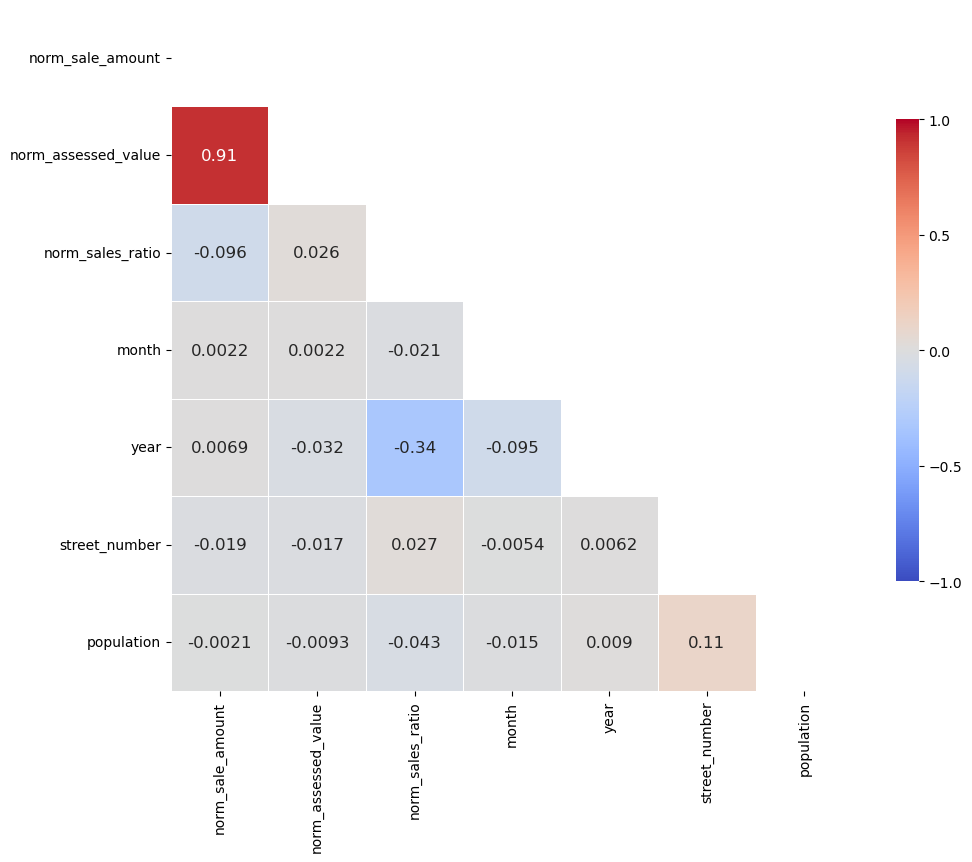

In [14]:
#eva_corr heatmap
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(eva_corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(eva_corr.columns, rotation = 0)
ax.set_xticklabels(eva_corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

>Notes: This heat map indicates there is a very strong positive correlation between __norm_sale_amount and norm_assessed_value__. There is also a moderate negative correlation between __year and norm_sales_ratio__. There is a weak relationship between __population and street_number__ (though this information may be interesting, it is likely of little consequence to the analysis).

### Strong correlations scatterplot

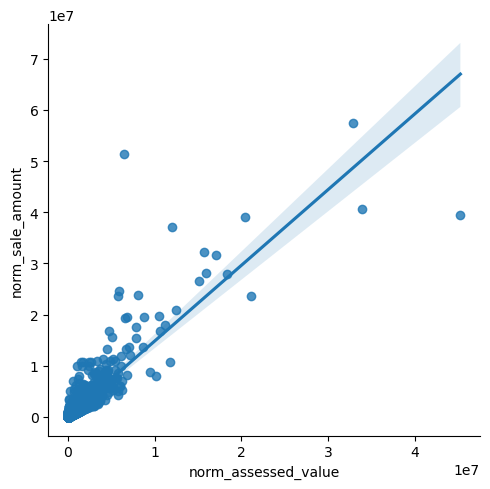

In [15]:
#Making a scatterplot for norm_assessed_value and norm_sale_amount
splot1 = sns.lmplot(x = 'norm_assessed_value', y = 'norm_sale_amount', data = df)

>Notes: There is a strong linear interdependence. Most values seem to be in sales_amounts < 300,000,000 and assessed_values < 200,000,000. From 0 up to these thresholds, tightness gradually reduces. Above these thresholds data is less consistent, but seems to follow the same trend with less reliability. 

In [16]:
#Making a subgroup of values below the thresholds noted above
low_vals = eva.loc[(eva['norm_sale_amount'] < 30000000) & (eva['norm_assessed_value'] < 20000000)]

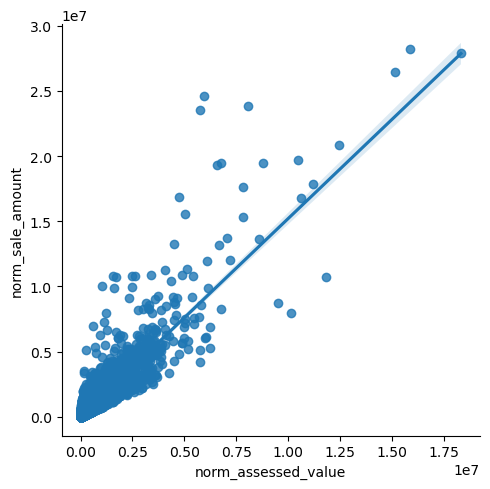

In [17]:
#Making a scatterplot for assessed_value and sale_amount
splot1b = sns.lmplot(x = 'norm_assessed_value', y = 'norm_sale_amount', data = low_vals)

>Notes: The scatterplot of the subgroup confirms that the lower values fit the trend line fairly tightly

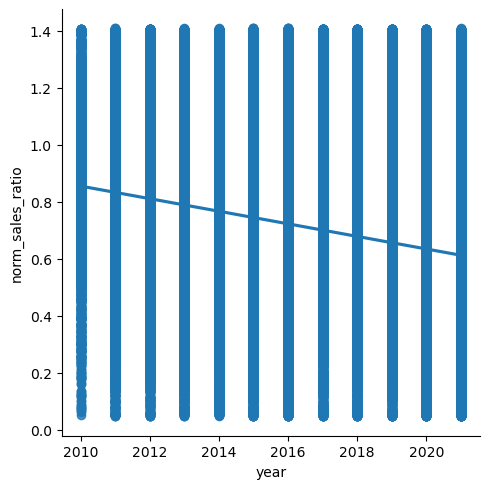

In [18]:
#Making a scatterplot for year and norm_sales_ratio
splot2 = sns.lmplot(x = 'year', y = 'norm_sales_ratio', data = df)

>Notes: This scatter plot indicates a linear interdependence. Looking closely at the bottom of 2010, 2011, and 2012 there seems to be slightly fewer points than in later years.

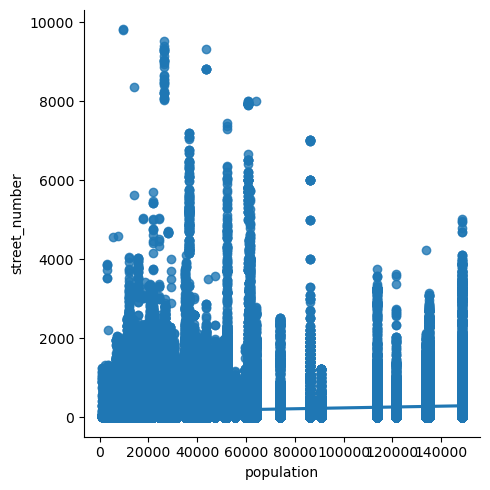

In [19]:
#Making a scatterplot for population and street_number
splot3 = sns.lmplot(x = 'population', y = 'street_number', data = df)

>Notes: This scatter plot shows that there are a handful of outliers in the data. There might be a non-linear interdependence, but it is hard to determine with so few populations above 70,000.

## 3. Pair plots

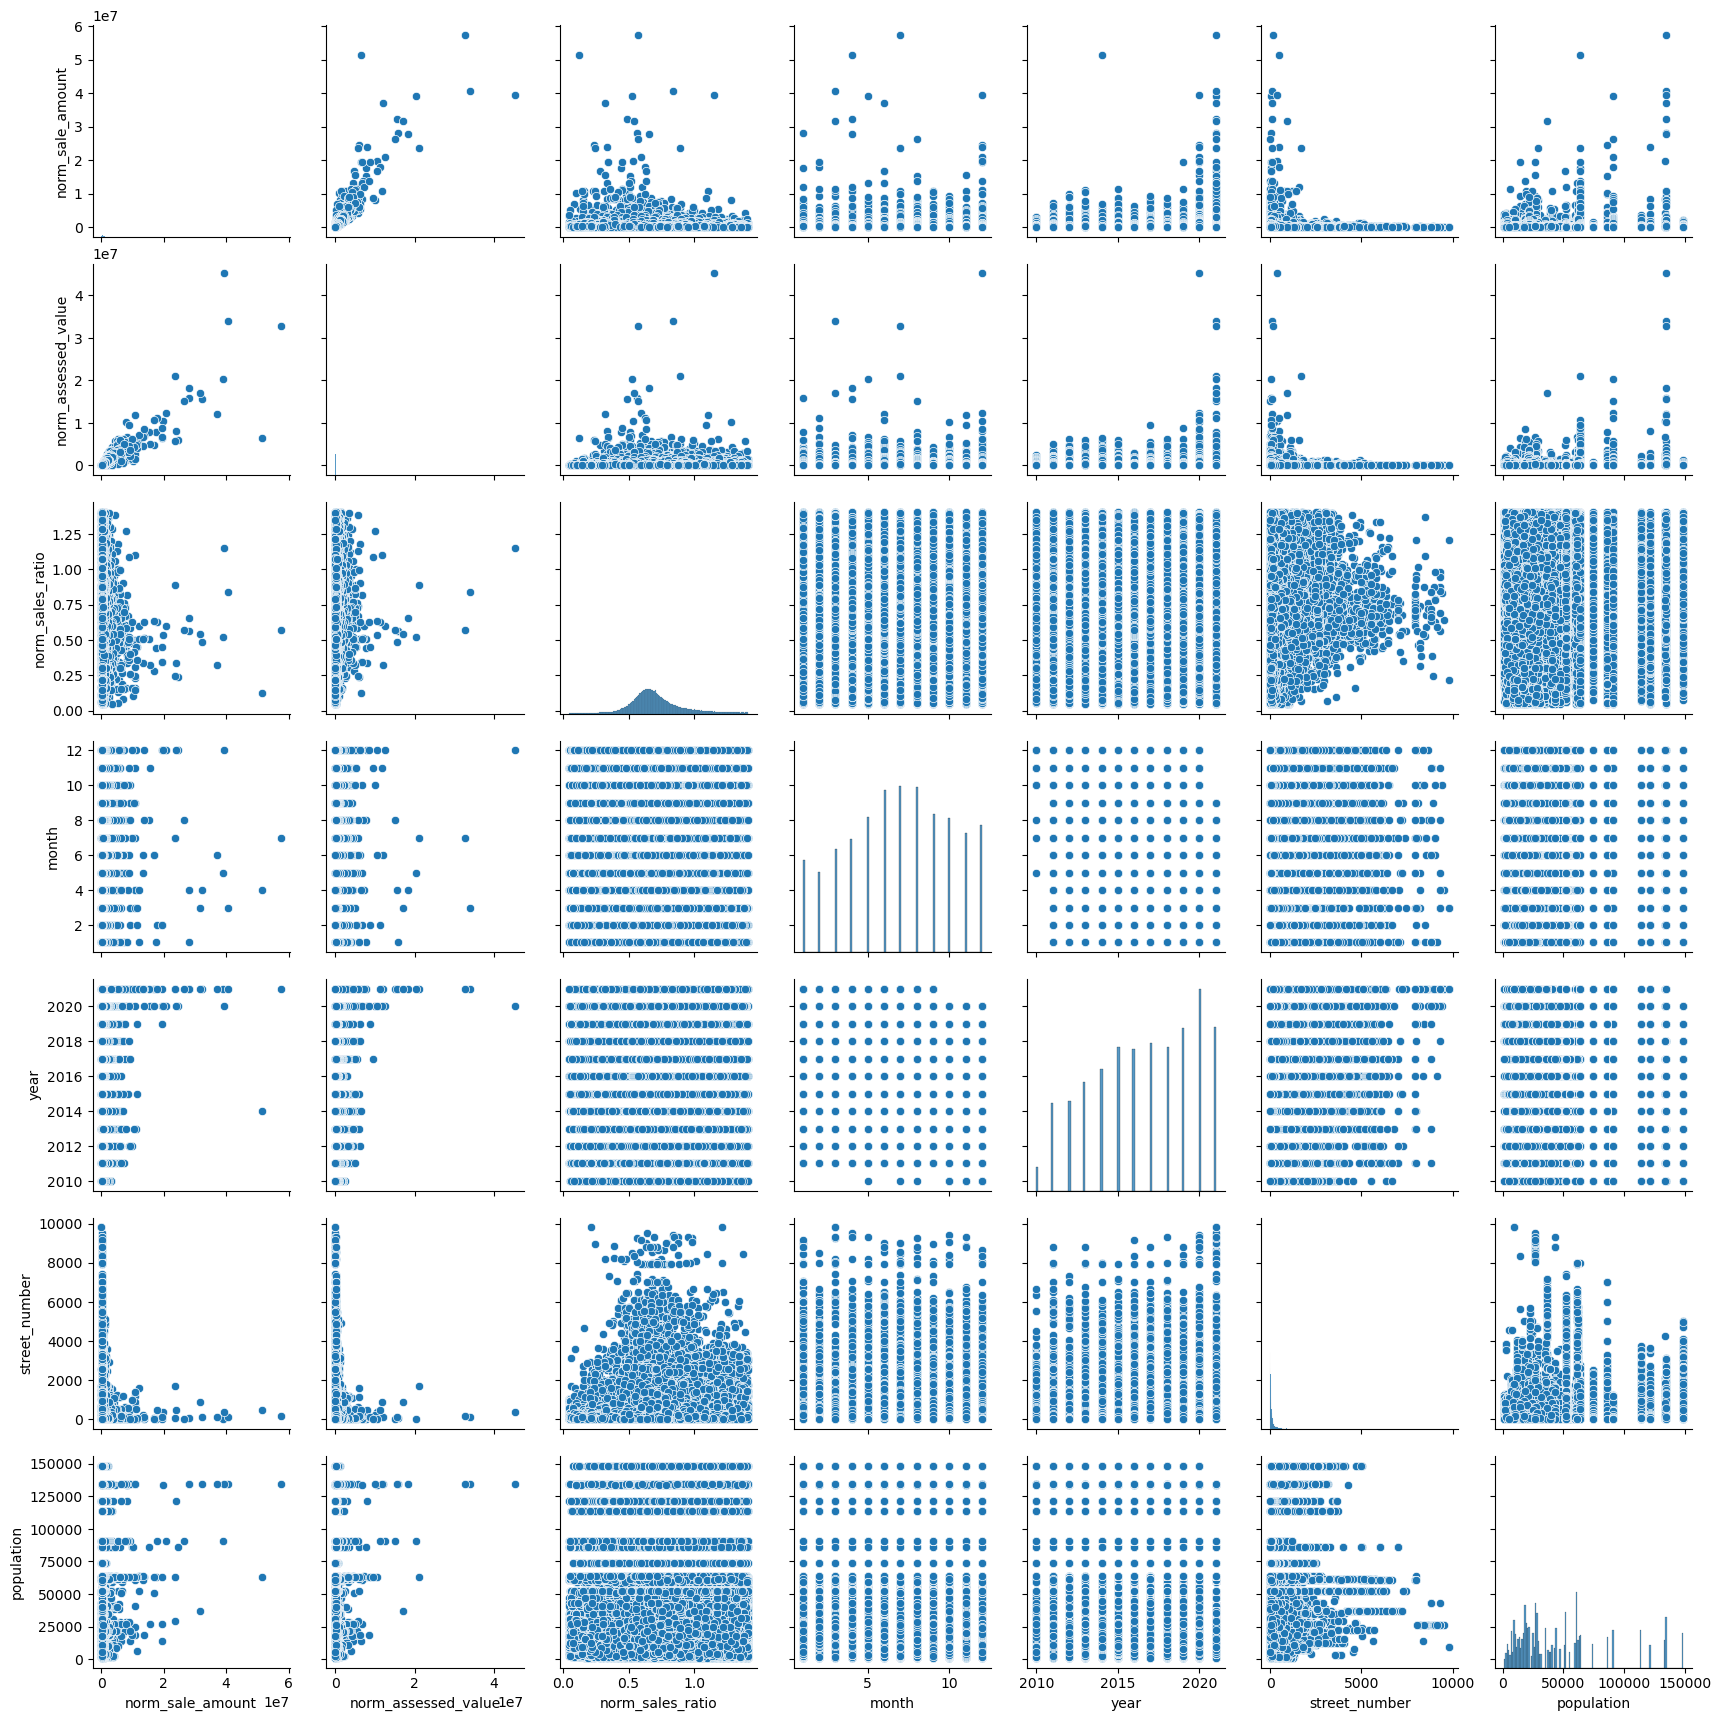

In [20]:
#Making a pair plot of eva
pair_plots = sns.pairplot(eva)

Notes:<br>
1. __norm_sale_amount__ 
    1. __population__: Greater concentration of sales < 10,000,000 in smaller towns. Might be helpful to make a city size category (large > 75,000 population >= small). 
    1. __street_number__: street_numbers > 2,000 do not have norm_sale_amounts > 5,000,000.
    1. __year__: 2010 to 2018 have norm_sale_amounts in about the same range, but sales start dramatically increasing in 2019.
    1. __norm_sales_ratio__: norm_sale_amounts > 12,000,000 seem to stay closer to a norm_sales_ratio of 0.5 than those < 12,000,000.
    1. __norm_assessed_value__: has the strongest interrelation to norm_sale_amount.
1. __norm_assessed_value__
    1. __population__: similar division as norm_sale_amount that was noted above.
    1. __street_number__: similar division as norm_sale_amount that was noted above.
    1. __year__: similar changes to norm_sale_amount starting in 2019 that was noted above.
    1. __norm_sales_ratio__: norm_assessed_value > 7,000,000 seems to stay closer to a norm_sales_ratio of 0.5 than those < 7,000,000.
1. __norm_sales_ratio__ - has healthy bell-curve
    1. street_number: as street_number increases, adherence to norm_sales_ratio of 0.7/0.75 increases. Possible non-linear interrelationship.
1. __month__
    1. Most sales occur (or are recorded) in June, July, and August.
    1. Fewest sales occur (or are recorded) in January, February, and March.
    1. Real estate sale volume has noticable seasonality.
1. __year__ - frequency increases until 2015, plateaus 2015 to 2018, increases 2019 to 2020. 2010 and 2021 have fewer months than all other years and need to be adjusted to compare.
    1. __street_number__: slight increase in street_number as year has increased.
1. __street_number__
    1. __population__: street_number does not exceede 5,500 in populations > 100,000.
1. __End Notes__:
    1. The scale of the pair plot makes it difficult to interpret the frequencies of __norm_sale_amount, norm_assessed_value, and street_number__.
    1. Including fedearl interest rates in this data set for comparison might provide some additional insight.
    1. Running pair plots for each property_type could provide more detailed information in the subgroups.

## 4. Categorical Plots

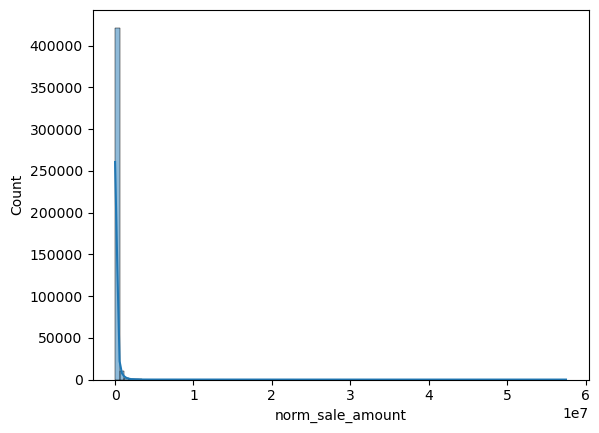

In [21]:
hist1 = sns.histplot(df['norm_sale_amount'], bins = 100, kde = True)

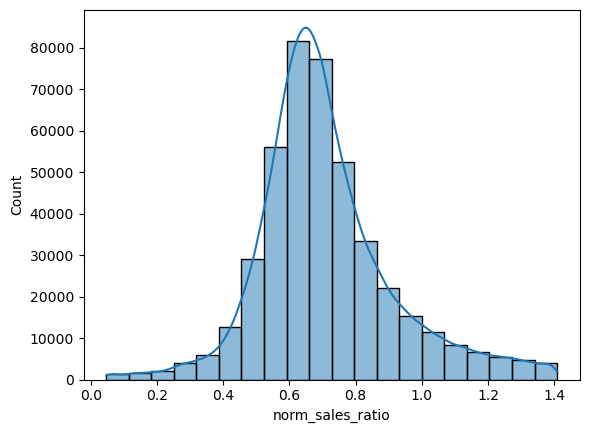

In [22]:
hist2 = sns.histplot(df['norm_sales_ratio'], bins = 20, kde = True)

>Small sale <= 5,000,000<br>
Medium sale > 5,000,000 & <= 12,000,000<br>
Large sale > 12,000,000

In [23]:
#setting small sale
df.loc[df['norm_sale_amount'] <= 5000000, 'sale_category'] = 'Small sale'

In [24]:
#setting medium sale
df.loc[(df['norm_sale_amount'] > 5000000) & (df['norm_sale_amount'] <= 12000000), 'sale_category'] = 'Medium sale'

In [25]:
#setting large sale
df.loc[df['norm_sale_amount'] > 12000000, 'sale_category'] = 'Large sale'

In [26]:
#checking shape
df.shape

(435179, 21)

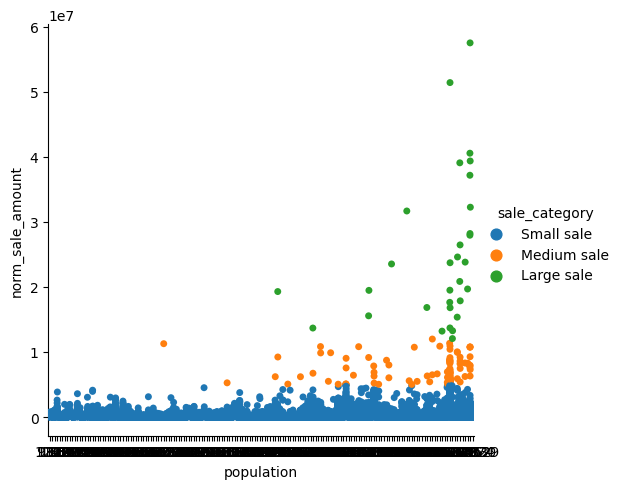

In [27]:
#categorical plot for pop_category
#sns.set(style='ticks')
sale_catplot = sns.catplot(x='population', y='norm_sale_amount', hue='sale_category', data=df)

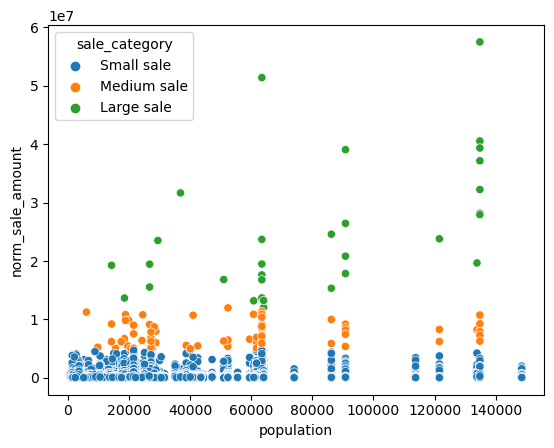

In [28]:
#categorical scatterplot: populatin v norm_sales_amount with sale_category
splot4 = sns.scatterplot(x = 'population', y = 'norm_sale_amount', data = df, hue='sale_category')

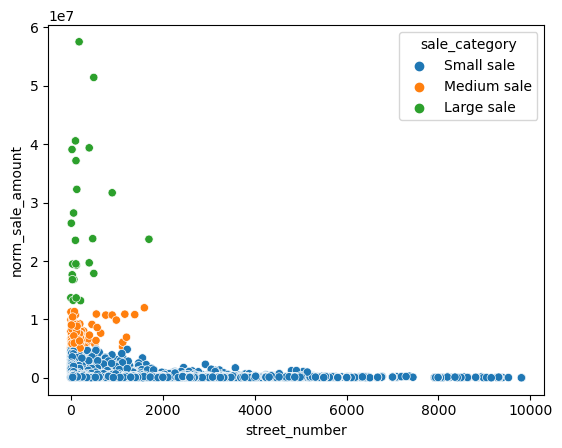

In [29]:
#categorical scatterplot: street_number v norm_sales_amount with sale_category
splot5 = sns.scatterplot(x = 'street_number', y = 'norm_sale_amount', data = df, hue='sale_category')

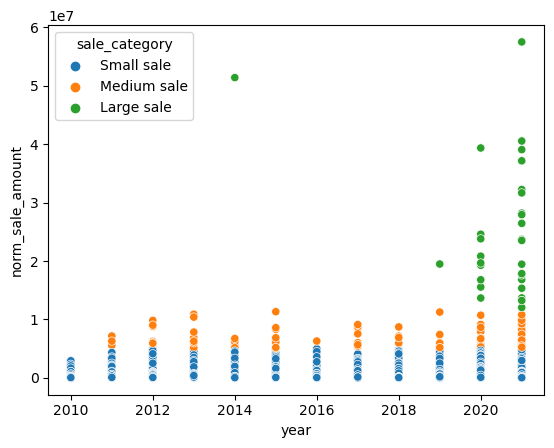

In [30]:
#categorical scatterplot: year v norm_sales_amount with sale_category
splot6 = sns.scatterplot(x = 'year', y = 'norm_sale_amount', data = df, hue='sale_category')

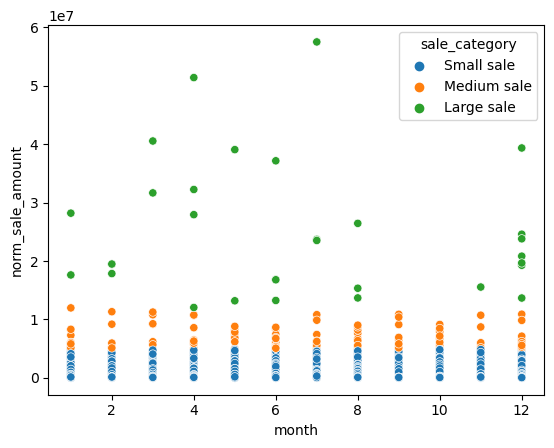

In [31]:
#categorical scatterplot: month v norm_sales_amount with sale_category
splot7 = sns.scatterplot(x = 'month', y = 'norm_sale_amount', data = df, hue='sale_category')

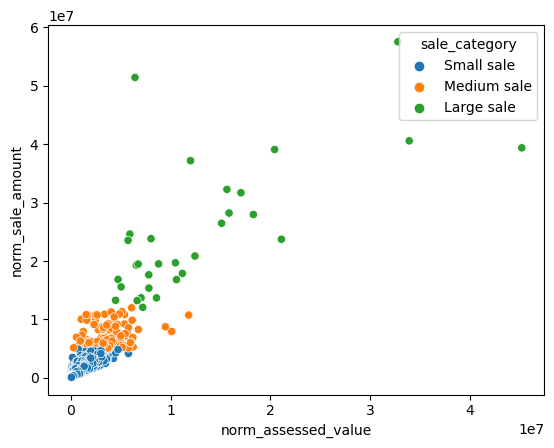

In [32]:
#categorical scatterplot: norm_assessed_value v norm_sales_amount with sale_category
splot8 = sns.scatterplot(x = 'norm_assessed_value', y = 'norm_sale_amount', data = df, hue='sale_category')

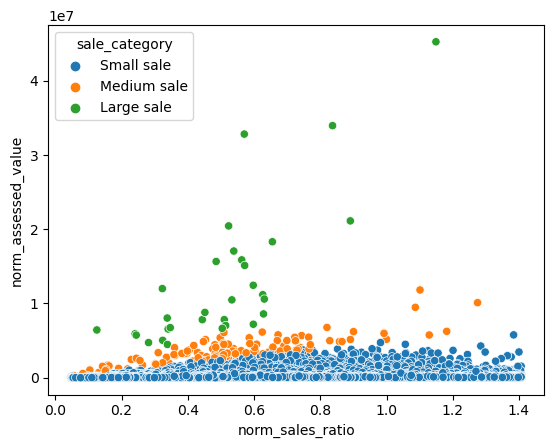

In [33]:
#categorical scatterplot: norm_sales_ratio v norm_assessed_value with sale_category
splot9 = sns.scatterplot(x = 'norm_sales_ratio', y = 'norm_assessed_value', data = df, hue='sale_category')

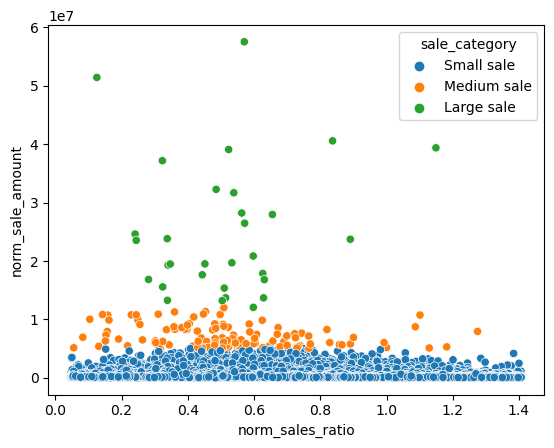

In [34]:
#categorical scatterplot: norm_sales_ratio v norm_sales_amount with sale_category
splot10 = sns.scatterplot(x = 'norm_sales_ratio', y = 'norm_sale_amount', data = df, hue='sale_category')

C:\Users\theva\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


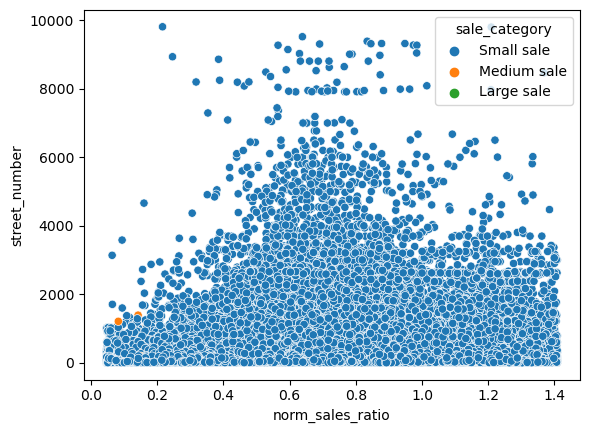

In [35]:
#categorical scatterplot: norm_sales_ratio v street_number with sale_category
splot11 = sns.scatterplot(x = 'norm_sales_ratio', y = 'street_number', data = df, hue='sale_category')

>Notes: There are some noticable trends between sale_category and population, street_number, and year. Some of the unusual clustering, however makes me think it is a good idea to examine the property types in categorical plots before drawing any conclusions.

## 5. Property Type Categorical Plots

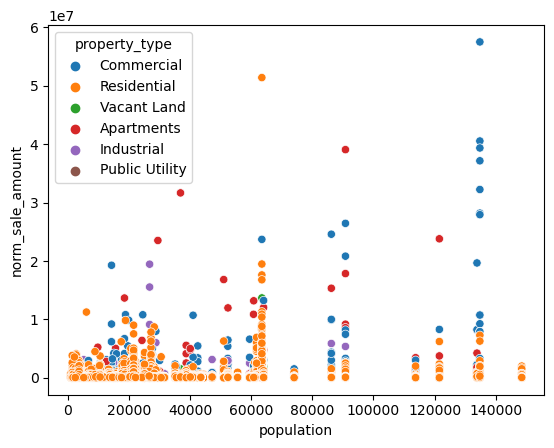

In [36]:
#categorical scatterplot: population v norm_sale_amount with property_type category
splot12 = sns.scatterplot(x = 'population', y = 'norm_sale_amount', data = df, hue='property_type')

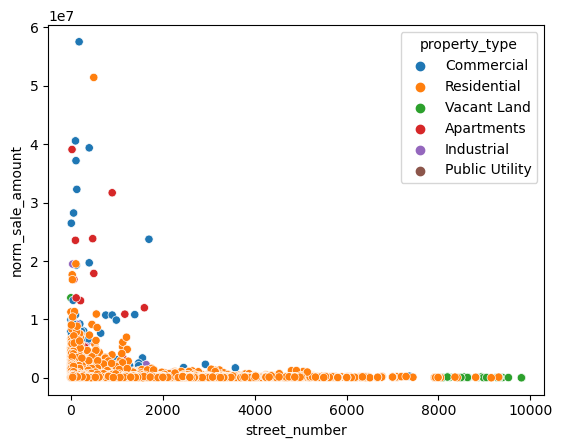

In [37]:
#categorical scatterplot: street_number v norm_sale_amount with property_type category
splot13 = sns.scatterplot(x = 'street_number', y = 'norm_sale_amount', data = df, hue='property_type')

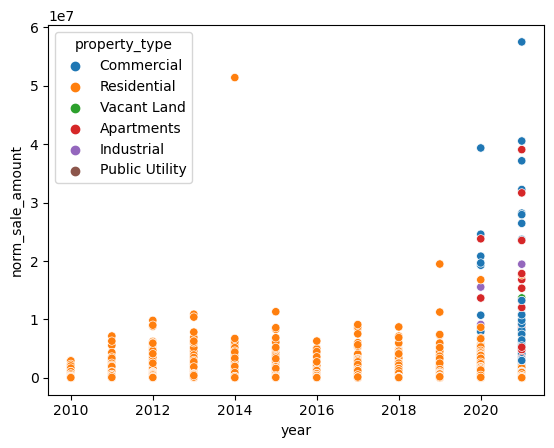

In [38]:
#categorical scatterplot: year v norm_sale_amount with property_type category
splot14 = sns.scatterplot(x = 'year', y = 'norm_sale_amount', data = df, hue='property_type')

C:\Users\theva\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


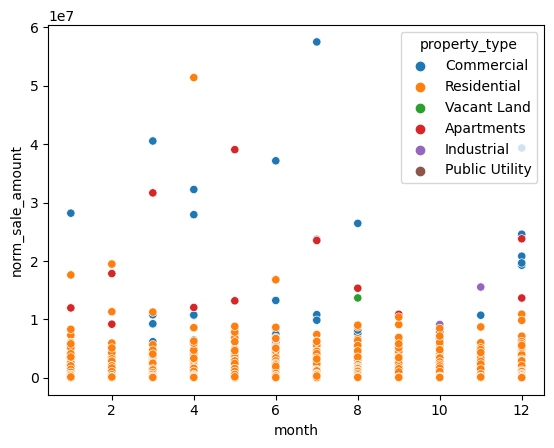

In [39]:
#categorical scatterplot: month v norm_sale_amount with property_type category
splot15 = sns.scatterplot(x = 'month', y = 'norm_sale_amount', data = df, hue='property_type')

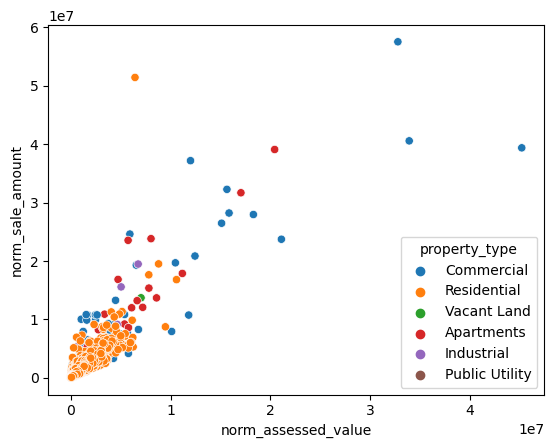

In [40]:
#categorical scatterplot: norm_assessed_value v norm_sale_amount with property_type category
splot16 = sns.scatterplot(x = 'norm_assessed_value', y = 'norm_sale_amount', data = df, hue='property_type')

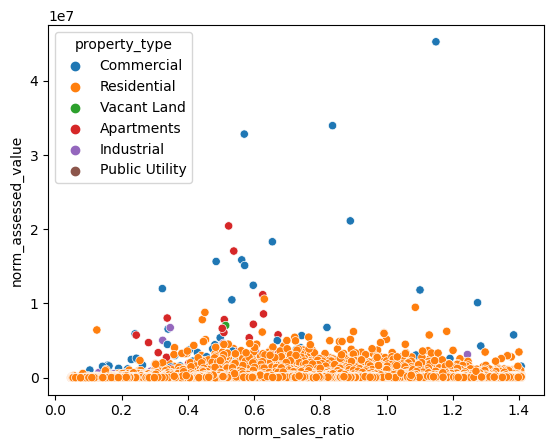

In [41]:
#categorical scatterplot: norm_sales_ratio v norm_assessed_value with property_type category
splot17 = sns.scatterplot(x = 'norm_sales_ratio', y = 'norm_assessed_value', data = df, hue='property_type')

C:\Users\theva\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


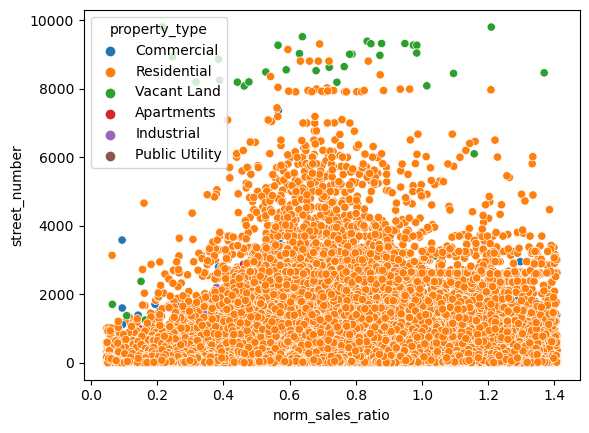

In [42]:
#categorical scatterplot: norm_sales_ratio v street_number with property_type category
splot18 = sns.scatterplot(x = 'norm_sales_ratio', y = 'street_number', data = df, hue='property_type')

>Notes: 
>    1. Higher populations have more sales that exceede 10,000,00, yet almost all sale_amounts > 10,000,000 are non-residential.
>    2. Vacant land seems to have a large clustering of street_numbers > 8,000. Residential types might be obscuring other types.
>    3. Extremely high-value sales in 2020 and 2021 seem to be entirely non-residential. There are notably few non-residential types pre-2020.
>    1. There is one residental type that has a norm_sale_amount > 50,000,000 and all others are < 25,000,000.
>    4. End Notes: Create residential and non-residential subgroups and compare in norm_sale_amount v populaton, street_number, and year. Also exclude outlier norm_sale_amount > 50,000,000.

In [43]:
#making residential and non-residential sub-groups
res = df.loc[(df['property_type'] == 'Residential') & (df['norm_sale_amount'] < 25000000)]
non_res= df.loc[df['property_type'] != 'Residential']

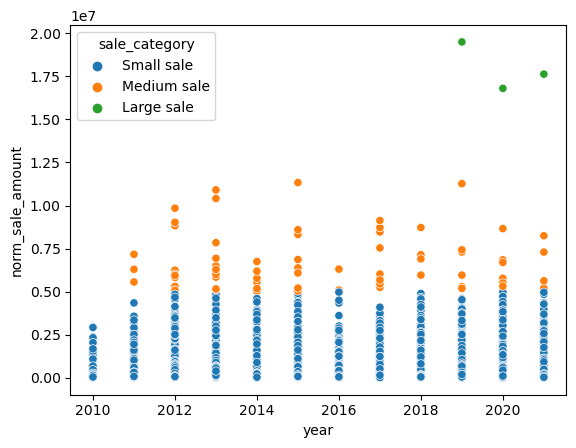

In [44]:
#residential year v norm_sale_amount categorical scatter plot
splot19 = sns.scatterplot(x = 'year', y = 'norm_sale_amount', data = res, hue='sale_category')

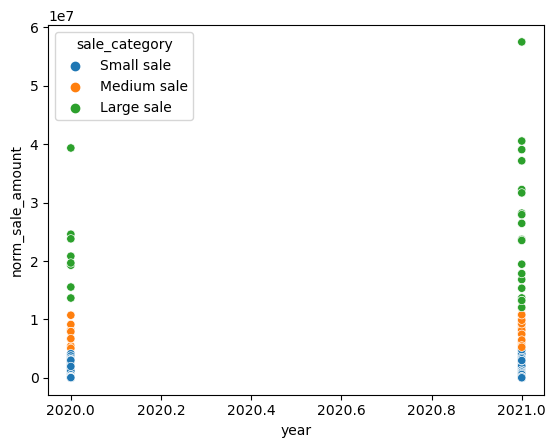

In [45]:
#non-residential year v norm_sale_amount categorical scatter plot
splot20 = sns.scatterplot(x = 'year', y = 'norm_sale_amount', data = non_res, hue='sale_category')

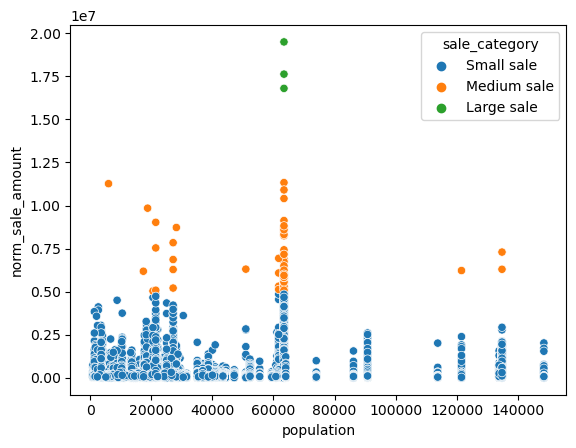

In [46]:
#residential population v norm_sale_amount categorical scatter plot
splot21 = sns.scatterplot(x = 'population', y = 'norm_sale_amount', data = res, hue='sale_category')

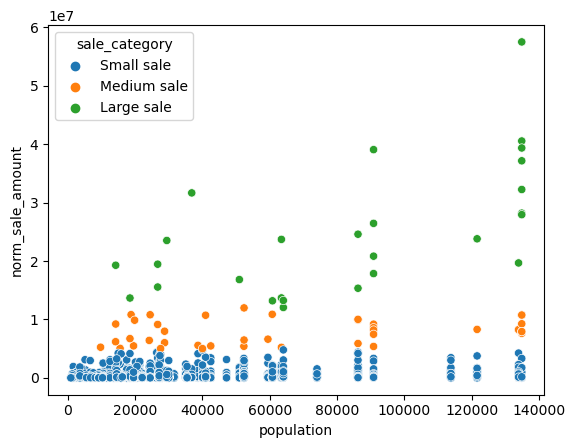

In [47]:
#non-residential population v norm_sale_amount categorical scatter plot
splot22 = sns.scatterplot(x = 'population', y = 'norm_sale_amount', data = non_res, hue='sale_category')

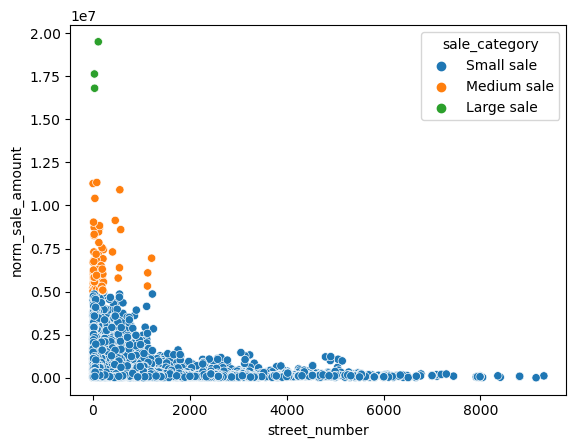

In [48]:
#residential street_number v norm_sale_amount categorical scatter plot
splot23 = sns.scatterplot(x = 'street_number', y = 'norm_sale_amount', data = res, hue='sale_category')

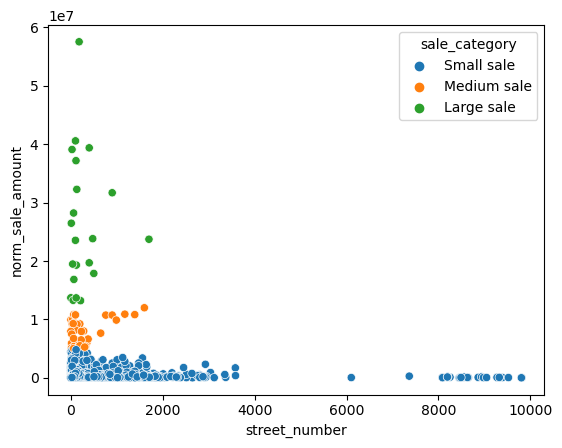

In [49]:
#non-residential street_number v norm_sale_amount categorical scatter plot
splot24 = sns.scatterplot(x = 'street_number', y = 'norm_sale_amount', data = non_res, hue='sale_category')

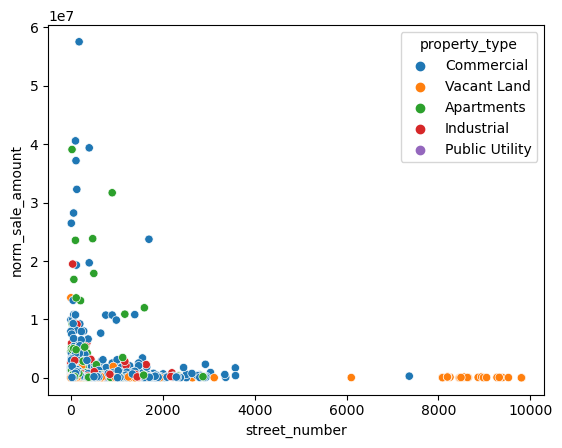

In [50]:
#non-residential street_number v norm_sale_amount categorical scatter plot
splot25 = sns.scatterplot(x = 'street_number', y = 'norm_sale_amount', data = non_res, hue='property_type')

In [51]:
#checking residential-only shape
res.shape

(430492, 21)

In [52]:
#checking non-residential shape
non_res.shape

(4686, 21)

>Notes: There seem to be no non-residential records prior to 2020. The majority of high norm_sale_amount records are from non-residential properties. An EVA should be conducted on the residential-only subgroup. Due to the lack of historic records, non-residential property types should be dropped from the analysis. 4,686 non-residential records dropped. 1 record with norm_sale_amount > 25,000,000 dropped.

In [53]:
#checking property_type count of residential-only df
res['property_type'].value_counts(dropna = False)

Residential    430492
Name: property_type, dtype: int64

In [54]:
#dropping property_type as it no longer contains useful data
res.drop('property_type', axis =1, inplace = True)

C:\Users\theva\AppData\Local\Temp\ipykernel_9736\4185545829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res.drop('property_type', axis =1, inplace = True)


In [55]:
#checking drop
res.head()

serial_number  list_year     town  assessed_value  sale_amount  \
1          20002       2020  Ashford          253000     430000.0   
2         200212       2020     Avon          130400     179900.0   
3         200243       2020     Avon          619290     890000.0   
4         200377       2020     Avon          862330    1447500.0   
5         200109       2020     Avon          847520    1250000.0   

   sales_ratio residential_type  in_pandemic  month  year  street_number  \
1       0.5883    Single Family            1     10  2020          390.0   
2       0.7248            Condo            1      3  2021            5.0   
3       0.6958    Single Family            1      4  2021          111.0   
4       0.5957    Single Family            1      7  2021           70.0   
5       0.6780    Single Family            1     12  2020           57.0   

  street_suffix  population  latitude  longitude  price_index  \
1          ROAD        4193   41.8731   -72.1216      254.076   
2         DRIVE       18821   41.8096   -72.8305      258.935   
3         DRIVE       18821   41.8096   -72.8305      261.237   
4         DRIVE       18821   41.8096   -72.8305      267.789   
5         DRIVE       18821   41.8096   -72.8305      254.081   

   norm_assessed_value  norm_sale_amount  norm_sales_ratio sale_category  
1             99576.50         169240.70          0.588372    Small sale  
2             50360.13          69476.90          0.724847    Small sale  
3            237060.60         340686.81          0.695831    Small sale  
4            322018.45         540537.51          0.595737    Small sale  
5            333562.92         491969.10          0.678016    Small sale

In [56]:
res.shape

(430492, 20)

## 6. Residential Correlations

In [57]:
#making a subgroup for residential correlations
res_eva = res[[
    'norm_sale_amount',
    'norm_assessed_value',
    'norm_sales_ratio',
    'month',
    'year',
    'street_number',
    'population',
    ]]

In [58]:
#making a residential correlation matrix
res_corr = res_eva.corr()

In [59]:
#checking matrix
res_corr

norm_sale_amount  norm_assessed_value  norm_sales_ratio  \
norm_sale_amount             1.000000             0.939059         -0.124266   
norm_assessed_value          0.939059             1.000000          0.038436   
norm_sales_ratio            -0.124266             0.038436          1.000000   
month                        0.004028             0.003171         -0.021392   
year                        -0.008476            -0.057819         -0.337635   
street_number               -0.033110            -0.028527          0.027714   
population                  -0.017030            -0.025465         -0.042845   

                        month      year  street_number  population  
norm_sale_amount     0.004028 -0.008476      -0.033110   -0.017030  
norm_assessed_value  0.003171 -0.057819      -0.028527   -0.025465  
norm_sales_ratio    -0.021392 -0.337635       0.027714   -0.042845  
month                1.000000 -0.093379      -0.004966   -0.015136  
year                -0.093379  1.000000       0.000965    0.010427  
street_number       -0.004966  0.000965       1.000000    0.109070  
population          -0.015136  0.010427       0.109070    1.000000

In [60]:
#making residential heatmap mask
mask = np.zeros_like(res_corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

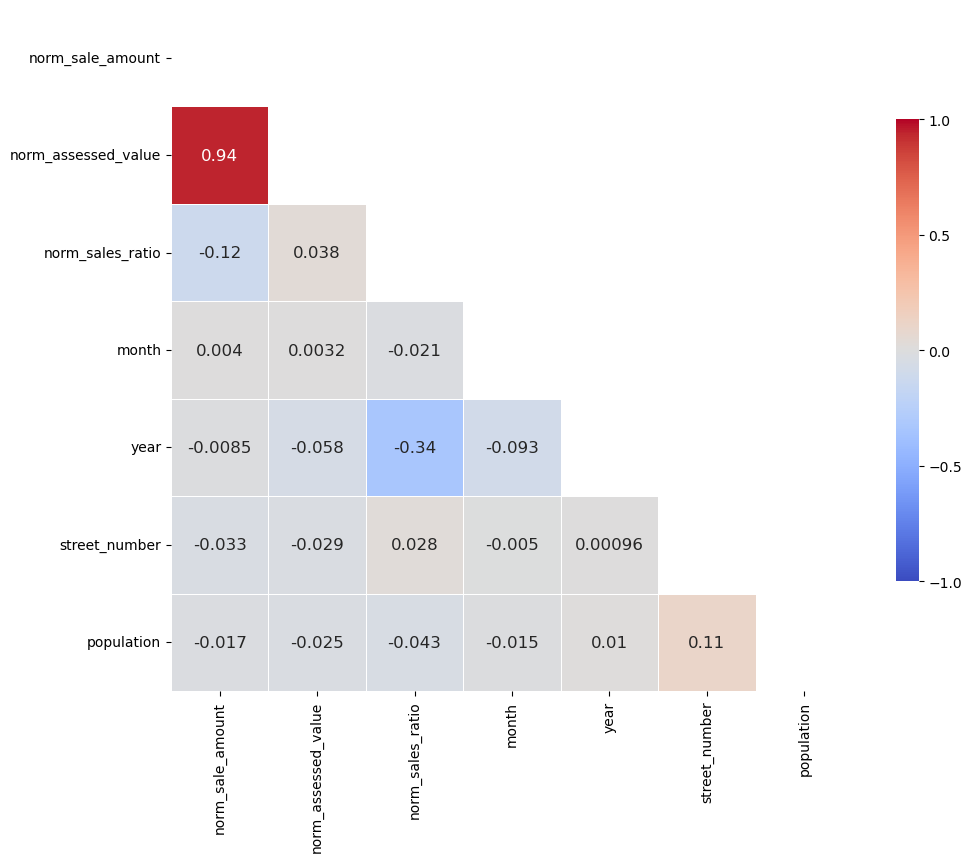

In [61]:
#res_corr heatmap
f, ax = plt.subplots(figsize=(11, 15)) 
res_heatmap = sns.heatmap(res_corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(res_corr.columns, rotation = 0)
ax.set_xticklabels(res_corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

>Notes:<br>
>1. __norm_assessed_value and norm_sale_amount__ have a strong positive correlation. norm_assessed_value is likely the dependent variable.
>1. __norm_sales_ratio and norm_sale_amount__ have a weak negative correlation
>1. __year and norm_sales_ratio__ have a moderate negative relationship. This indicates that sales ratios have been decreasing as years have been increasing.
>1. __population and street_number__ have a weak positive correlation. This indicates that as population increases, so do street numbers.

## 7. Residential Pair Plots

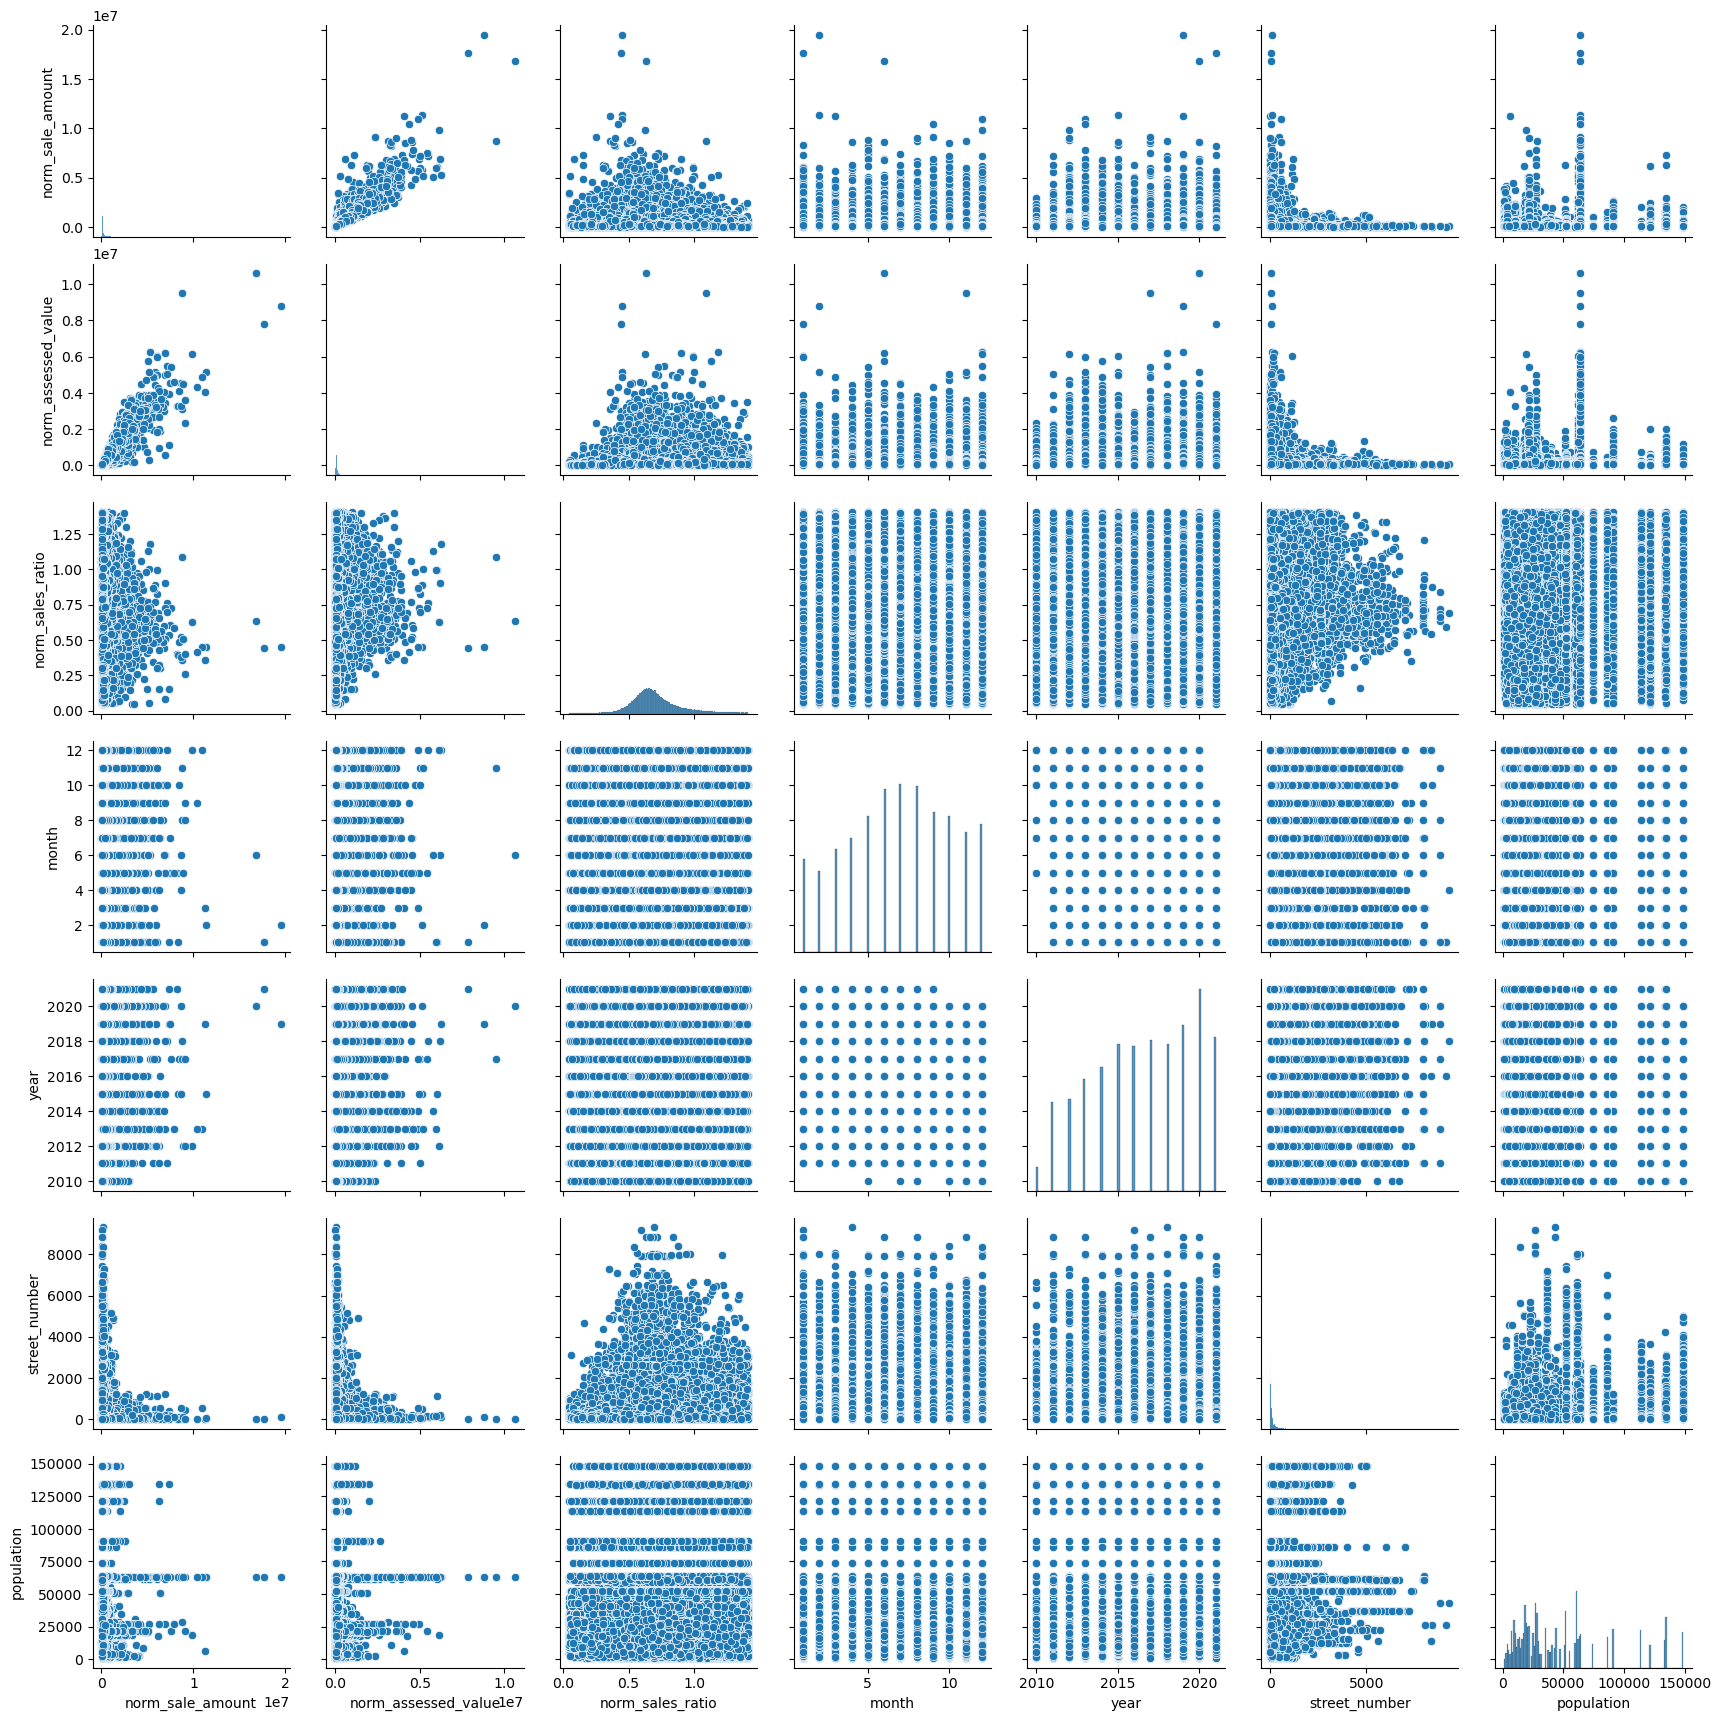

In [62]:
#Making a pair plot of res_eva
res_pair_plots = sns.pairplot(res_eva)

Notes:<br>
1. __norm_sale_amount__ 
    1. __street_number__: street_numbers < 1,500 have largest norm_sale_amounts (7 to 20 million). street_numbers > 5,750 have smallest norm_sale_amounts (less than 1,000,000).
    1. __year__: 2019, 2020, and 2021 have some larger-than-usual norm_sale_amounts, but mostly stay within normal range.
    1. __norm_sales_ratio__: norm_sale_amounts > 3,000,000 seem to stay closer to a norm_sales_ratio of 0.6 than those < 3,000,000.
    1. __norm_assessed_value__: has the strongest interrelation to norm_sale_amount.
1. __norm_assessed_value__
    1. __street_number__: similar division as norm_sale_amount that was noted above.
    1. __year__: similar changes to norm_sale_amount starting in 2019 that was noted above.
    1. __norm_sales_ratio__: norm_assessed_value > 1,000,000 seems to stay closer to a norm_sales_ratio of 0.65. norm_assessed_value > 4,000,000 has considerably less consistency.
1. __norm_sales_ratio__ - has healthy bell-curve
    1. street_number: as street_number increases, adherence to norm_sales_ratio of 0.7 increases. Possible non-linear interrelationship.
1. __month__
    1. Most sales occur (or are recorded) in June, July, and August.
    1. Fewest sales occur (or are recorded) in January, February, and March.
    1. Real estate sale volume has noticable seasonality.
1. __year__ - frequency increases until 2015, plateaus 2016 to 2018, increases 2019 and 2020. 2010 and 2021 have fewer months than all other years and need to be adjusted to compare.
    1. __street_number__: slight increase in street_number as year has increased.
1. __street_number__
    1. __population__: street_number has different trends for cities above and below 100,000 population.
1. __End Notes__:
    1. The scale of the pair plot makes it difficult to interpret the frequencies of __norm_sale_amount, norm_assessed_value, and street_number__.
    1. Including fedearl interest rates in this data set for comparison might provide some additional insight.
    1. Categorical plots residential_types could provide more detailed information in the subgroups.
    1. Make assessed_value_category with divisions at norm_assessed_value = 1,000,000 and 4,000,000

## 8. Residential Categorical Plots

### norm_sale_amount Categories

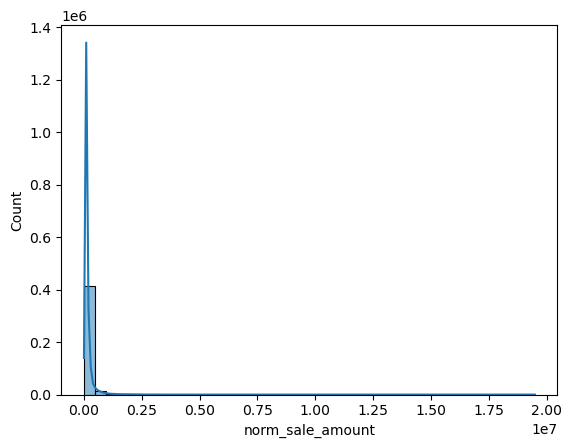

In [63]:
res_hist1 = sns.histplot(res['norm_sale_amount'], bins = 40, kde = True)

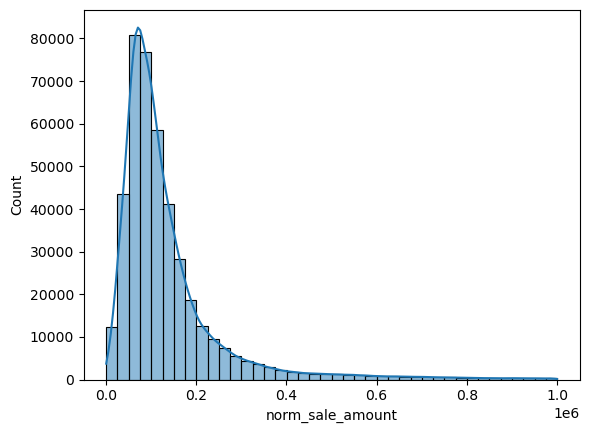

In [64]:
res_hist1b = sns.histplot(res.loc[res['norm_sale_amount']<1000000, 'norm_sale_amount'], bins = 40, kde = True)

In [65]:
low_limit = 250000
mid_limit = 750000
high_limit = 1500000

In [66]:
#setting low assessed
res.loc[res['norm_sale_amount'] < low_limit, 'sale_category'] = 'Low range'

In [67]:
#setting mid assessed
res.loc[(res['norm_sale_amount'] >= low_limit) & (df['norm_sale_amount'] < mid_limit), 'sale_category'] = 'Mid range'

In [68]:
#setting mid assessed
res.loc[(res['norm_sale_amount'] >= mid_limit) & (df['norm_sale_amount'] < high_limit), 'sale_category'] = 'High range'

In [69]:
#setting high assessed
res.loc[res['norm_sale_amount'] >= high_limit, 'sale_category'] = 'Ultra-high range'

In [70]:
res['sale_category'].value_counts(dropna=False)

Low range           381839
Mid range            40481
High range            6297
Ultra-high range      1875
Name: sale_category, dtype: int64

In [71]:
#checking shape
res.shape

(430492, 20)

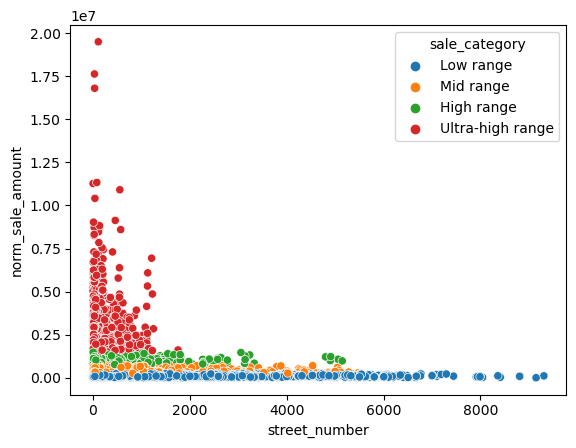

In [72]:
#categorical scatterplot: populatin v norm_sales_amount with sale_category
res_splot1 = sns.scatterplot(x = 'street_number', y = 'norm_sale_amount', data = res, hue='sale_category')

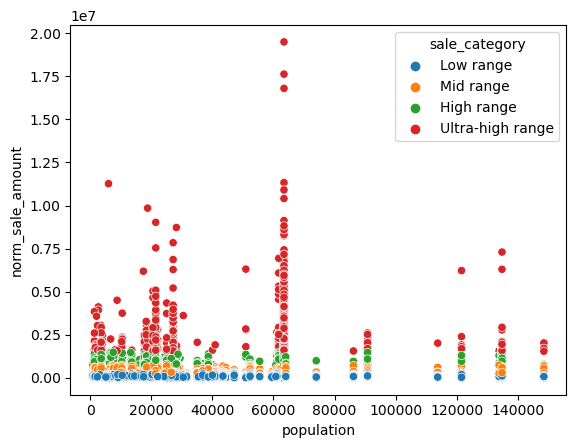

In [73]:
#categorical scatterplot: populatin v norm_sales_amount with sale_category
res_splot2 = sns.scatterplot(x = 'population', y = 'norm_sale_amount', data = res, hue='sale_category')

C:\Users\theva\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


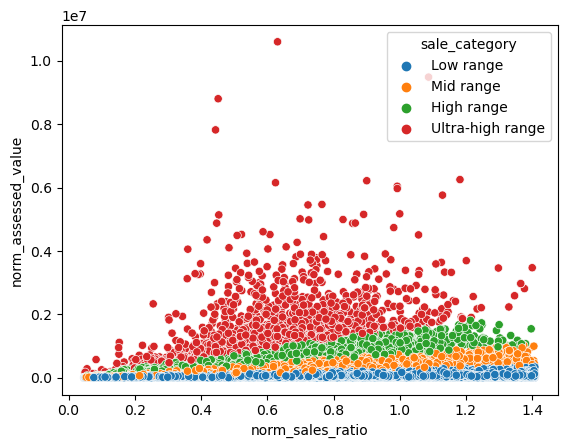

In [74]:
#categorical scatterplot: populatin v norm_sales_amount with sale_category
res_splot3 = sns.scatterplot(x = 'norm_sales_ratio', y = 'norm_assessed_value', data = res, hue='sale_category')

>Sale category notes:
>1. __street_number v norm_sale_amount__
>    - Ultra-high range sales rarely exceed street_number 1500
>    - High range sales rarely exceed street_number 3500
>    - Mid range sales rarely exceed street_number 5500
>    - Low range sales can have significantly larger street_number than other ranges
>1. __population v norm_sale_amount__
>    - populations between 60000 and 65000 have a very high degree of ultra-high range sales
>    - populations between 0 and 30000 have a high degree of ultra-high range sales
>    - populations between 30000 and 60000 have very few ultra-high range sales
>    - populations between 42000 and 50000 have only low and mid range sales
>1. __norm_sales_ratio v norm_assessed_value__
>    - High range sale frequency start to decrease sooner than mid and low range (at around norm_sales_ratio  = 1.3)
>    - Ultra-high range sales start to decrease sooner than all others (at around norm_sales_ratio = 1.2)
>    - This indicates that the larger a property's assessed value, the more likely it is to sell at or higher than the assessed value.

### norm_sales_ratio Categories

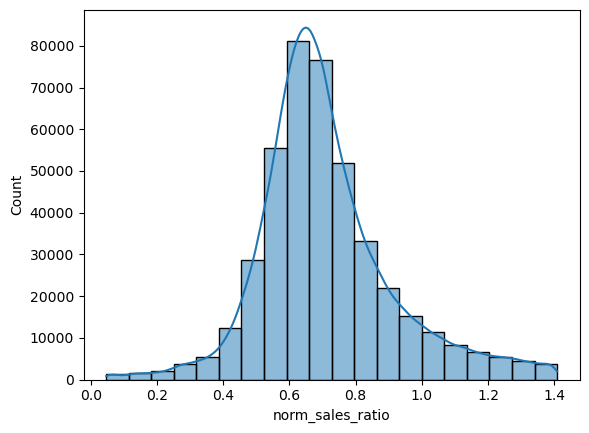

In [75]:
res_hist2 = sns.histplot(res['norm_sales_ratio'], bins = 20, kde = True)

>Notes:
> - Low ratio: norm_sales_ratio < 0.5
> - Average ratio: 0.5 <= norm_sales_ratio < 0.8
> - High ratio: norm_sales_ratio >= 0.8

In [76]:
#setting low ratio
res.loc[res['norm_sales_ratio'] < 0.5, 'ratio_category'] = 'Low ratio'

C:\Users\theva\AppData\Local\Temp\ipykernel_9736\957633317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res.loc[res['norm_sales_ratio'] < 0.5, 'ratio_category'] = 'Low ratio'


In [77]:
#setting low ratio
res.loc[(res['norm_sales_ratio'] >= 0.5) & (df['norm_sales_ratio'] < 0.8), 'ratio_category'] = 'Average ratio'

In [78]:
#setting high ratio
res.loc[res['norm_sales_ratio'] >= 0.8, 'ratio_category'] = 'High ratio'

In [79]:
res['ratio_category'].value_counts(dropna=False)

Average ratio    280571
High ratio       107550
Low ratio         42371
Name: ratio_category, dtype: int64

In [80]:
#checking shape
res.shape

(430492, 21)

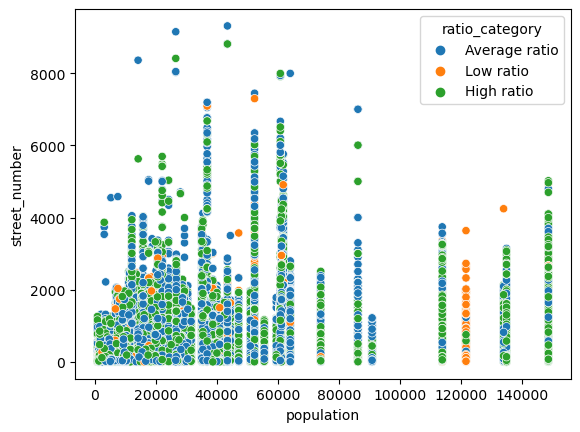

In [81]:
#categorical scatterplot: populatin v norm_sales_amount with sale_category
res_splot4 = sns.scatterplot(x = 'population', y = 'street_number', data = res, hue='ratio_category')

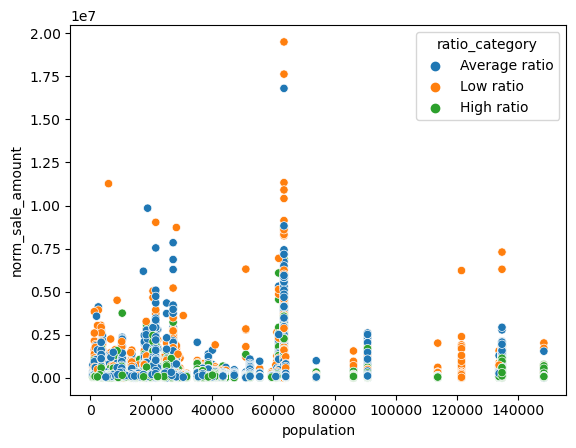

In [82]:
#categorical scatterplot: populatin v norm_sales_amount with sale_category
res_splot5 = sns.scatterplot(x = 'population', y = 'norm_sale_amount', data = res, hue='ratio_category')

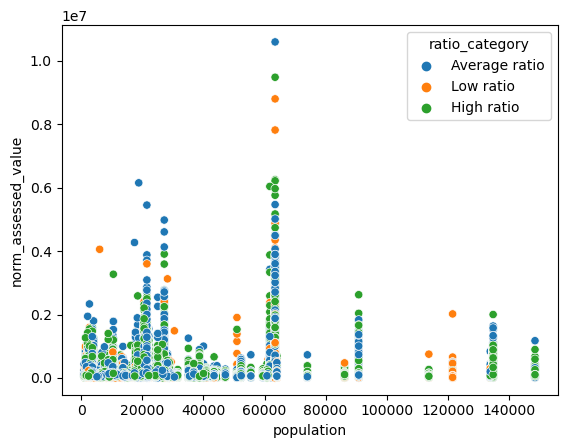

In [83]:
#categorical scatterplot: populatin v norm_sales_amount with sale_category
res_splot6 = sns.scatterplot(x = 'population', y = 'norm_assessed_value', data = res, hue='ratio_category')

>Ratio category notes: 
>    - These three charts show ratio categories by population in comparison to three different variables. All show slightly different distributions of ratio categories (probably due to different plotting proiorities). Few clear insights stood out.
>    - Low ratio sales tend to be more common in populations < 70,000 with the exception of population = 122,000 which has a very high degree of low ratio sales.

### residential_type Categoricals

In [84]:
#Checking frequency counts of residential_type
res['residential_type'].value_counts(dropna=False)

Single Family    319842
Condo             82222
Two Family        18420
Three Family       8470
Four Family        1538
Name: residential_type, dtype: int64

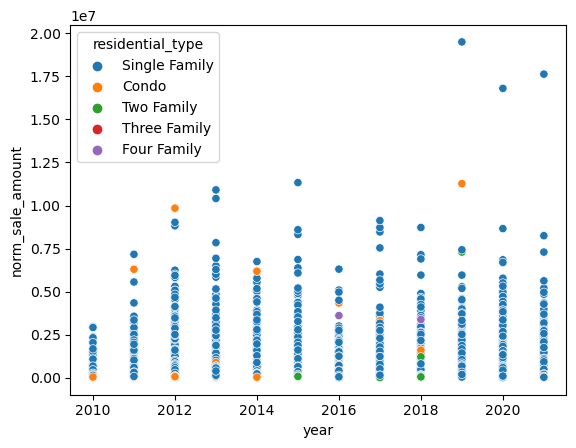

In [85]:
#categorical scatterplot: populatin v norm_sales_amount with sale_category
res_splot7 = sns.scatterplot(x = 'year', y = 'norm_sale_amount', data = res, hue='residential_type')

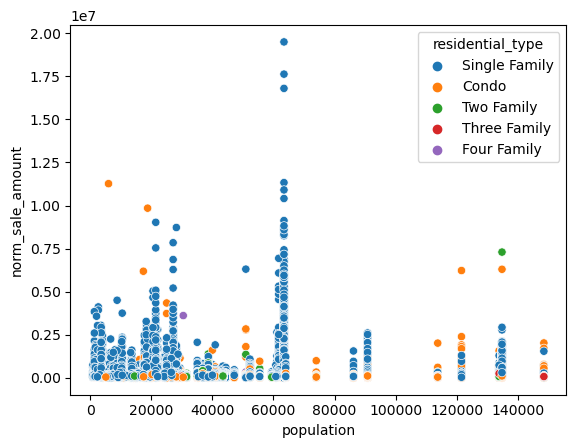

In [86]:
#categorical scatterplot: populatin v norm_sales_amount with sale_category
res_splot8 = sns.scatterplot(x = 'population', y = 'norm_sale_amount', data = res, hue='residential_type')

>Residential types notes:
>    - No distinct patterns were seen in these visualizations of residential types, though a couple observations might be worth investigating further.
>    - Some years seem to be almost entirely single family types, but the nature of the plot does not give conclusive data. Another chart type should be used to look at variations in resident types.
>    - The town at population = 75,000 seems to be entirely low value (relatively) condo sales. Worth investigating further.

## 9. Exports

In [ ]:
#exporting heatmap
heatmap.figure.savefig('eva_corr_heatmap.png')

In [ ]:
#exporting scatterplots
splot1.savefig('eva_splot_sale_vs_assessed.png')
splot1b.savefig('eva_splot_sale_vs_assessedb.png')
splot2.savefig('eva_splot_year_vs_ratio.png')
splot3.savefig('eva_splot_population_vs_street_number.png')

#exporting categorical scatter plots
fig = splot4.get_figure()
fig.savefig('cat_splot 4.png')
fig = splot5.get_figure()
fig.savefig('cat_splot 5.png')
fig = splot6.get_figure()
fig.savefig('cat_splot 6.png')
fig = splot7.get_figure()
fig.savefig('cat_splot 7.png')
fig = splot8.get_figure()
fig.savefig('cat_splot 8.png')
fig = splot9.get_figure()
fig.savefig('cat_splot 9.png')
fig = splot10.get_figure()
fig.savefig('cat_splot 10.png')
fig = splot11.get_figure()
fig.savefig('cat_splot 11.png')
fig = splot12.get_figure()
fig.savefig('cat_splot 12.png')
fig = splot13.get_figure()
fig.savefig('cat_splot 13.png')
fig = splot14.get_figure()
fig.savefig('cat_splot 14.png')
fig = splot15.get_figure()
fig.savefig('cat_splot 15.png')
fig = splot16.get_figure()
fig.savefig('cat_splot 16.png')
fig = splot17.get_figure()
fig.savefig('cat_splot 17.png')
fig = splot18.get_figure()
fig.savefig('cat_splot 18.png')
fig = splot19.get_figure()
fig.savefig('cat_splot 19.png')
fig = splot20.get_figure()
fig.savefig('cat_splot 20.png')
fig = splot21.get_figure()
fig.savefig('cat_splot 21.png')
fig = splot22.get_figure()
fig.savefig('cat_splot 22.png')
fig = splot23.get_figure()
fig.savefig('cat_splot 23.png')
fig = splot24.get_figure()
fig.savefig('cat_splot 24.png')
fig = splot25.get_figure()
fig.savefig('cat_splot 25.png')

In [ ]:
#exporting pair plots
pair_plots.savefig('eva_pair_plots.png')

In [ ]:
#exporting histograms
fig = hist1.get_figure()
fig.savefig('hist1.png')
fig = hist2.get_figure()
fig.savefig('hist2.png')

In [ ]:
#exporting catplots
sale_catplot.savefig('sale_catplot.png')

In [ ]:
#exporting res heatmap
fig = res_heatmap.get_figure()
fig.savefig('res_corr_heatmap.png')

In [ ]:
#exporting res pair plots
res_pair_plots.savefig('res_pair_plots.png')

In [ ]:
#exporting res histograms
fig = res_hist1.get_figure()
fig.savefig('res_hist1.png')
fig = res_hist1b.get_figure()
fig.savefig('res_hist1b.png')
fig = res_hist2.get_figure()
fig.savefig('res_hist2.png')

In [ ]:
#exporting res categorical scatterplots
fig = res_splot1.get_figure()
fig.savefig('res_cat_splot1.png')
fig = res_splot2.get_figure()
fig.savefig('res_cat_splot2.png')
fig = res_splot3.get_figure()
fig.savefig('res_cat_splot3.png')
fig = res_splot4.get_figure()
fig.savefig('res_cat_splot4.png')
fig = res_splot5.get_figure()
fig.savefig('res_cat_splot5.png')
fig = res_splot6.get_figure()
fig.savefig('res_cat_splot6.png')
fig = res_splot7.get_figure()
fig.savefig('res_cat_splot7.png')
fig = res_splot8.get_figure()
fig.savefig('res_cat_splot8.png')

In [89]:
res.head()

serial_number  list_year     town  assessed_value  sale_amount  \
1          20002       2020  Ashford          253000     430000.0   
2         200212       2020     Avon          130400     179900.0   
3         200243       2020     Avon          619290     890000.0   
4         200377       2020     Avon          862330    1447500.0   
5         200109       2020     Avon          847520    1250000.0   

   sales_ratio residential_type  in_pandemic  month  year  ...  street_suffix  \
1       0.5883    Single Family            1     10  2020  ...           ROAD   
2       0.7248            Condo            1      3  2021  ...          DRIVE   
3       0.6958    Single Family            1      4  2021  ...          DRIVE   
4       0.5957    Single Family            1      7  2021  ...          DRIVE   
5       0.6780    Single Family            1     12  2020  ...          DRIVE   

  population  latitude  longitude  price_index  norm_assessed_value  \
1       4193   41.8731   -72.1216      254.076             99576.50   
2      18821   41.8096   -72.8305      258.935             50360.13   
3      18821   41.8096   -72.8305      261.237            237060.60   
4      18821   41.8096   -72.8305      267.789            322018.45   
5      18821   41.8096   -72.8305      254.081            333562.92   

   norm_sale_amount  norm_sales_ratio  sale_category ratio_category  
1         169240.70          0.588372      Low range  Average ratio  
2          69476.90          0.724847      Low range  Average ratio  
3         340686.81          0.695831      Mid range  Average ratio  
4         540537.51          0.595737      Mid range  Average ratio  
5         491969.10          0.678016      Mid range  Average ratio  

[5 rows x 21 columns]

In [90]:
res.shape

(430492, 21)

In [91]:
#exporting residential dataset
res.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'CTRE 2011-2021 RES ONLY.pkl'))
res.to_csv(os.path.join(path, '02 Data','Prepared Data', 'CTRE 2011-2021 RES ONLY.csv'))

## 10. Hypotheses

1. Assessed value is the strongest determining factor on sale amount with a positive correlation.
1. Time of year play a role in the real estate market as summer months tend to have more sales than winter months. Could be a favorable weather correlation.
1. Properties with larger assessed values tend to be on smaller street numbers.
1. Properties with larger street numbers tend to have a narrower range of sales ratios, meaning the selling price of a property with a larger street number can be predicted more accurately than one with a smaller street nmuber.
1. Properties with larger assessed values tend to have a narrower range of sales ratios, meaning the selling price of a property with a larger assessed value can be predicted more accurately than one with a smaller assessed value.
1. Population seems to play a role in sale price, but it is obscure at this time.